In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


In [2]:
#Importing the dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
#Loading data into a dataframe
data = pd.read_csv("/content/Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [6]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [8]:
data.shape

(10000, 18)

In [9]:
data.drop(['objid','specobjid'],axis=1,inplace=True)

In [10]:
data.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512


In [11]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder().fit(data['class'])
data['class']=le.transform(data['class'])

In [14]:
data.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512


In [15]:
#splitting the datasets
x=data.drop('class',axis=1)
y=data['class']

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [17]:
x

array([[ 0.16745842, -0.58492272,  1.03148637, ...,  1.03148936,
         1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, ..., -0.63621258,
        -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796, ..., -0.65633905,
        -0.60919097,  0.77527888],
       ...,
       [-0.92039468,  1.46090664,  0.16753826, ...,  3.26608697,
         2.69309363,  1.3036668 ],
       [-0.92197294,  1.46432109,  0.31801835, ..., -0.56688806,
        -0.70581092, -0.60143828],
       [-0.91804124,  1.46639319,  0.79229193, ..., -0.56688806,
        -0.70581092, -0.5820479 ]])

In [18]:
#splitting as train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=128)

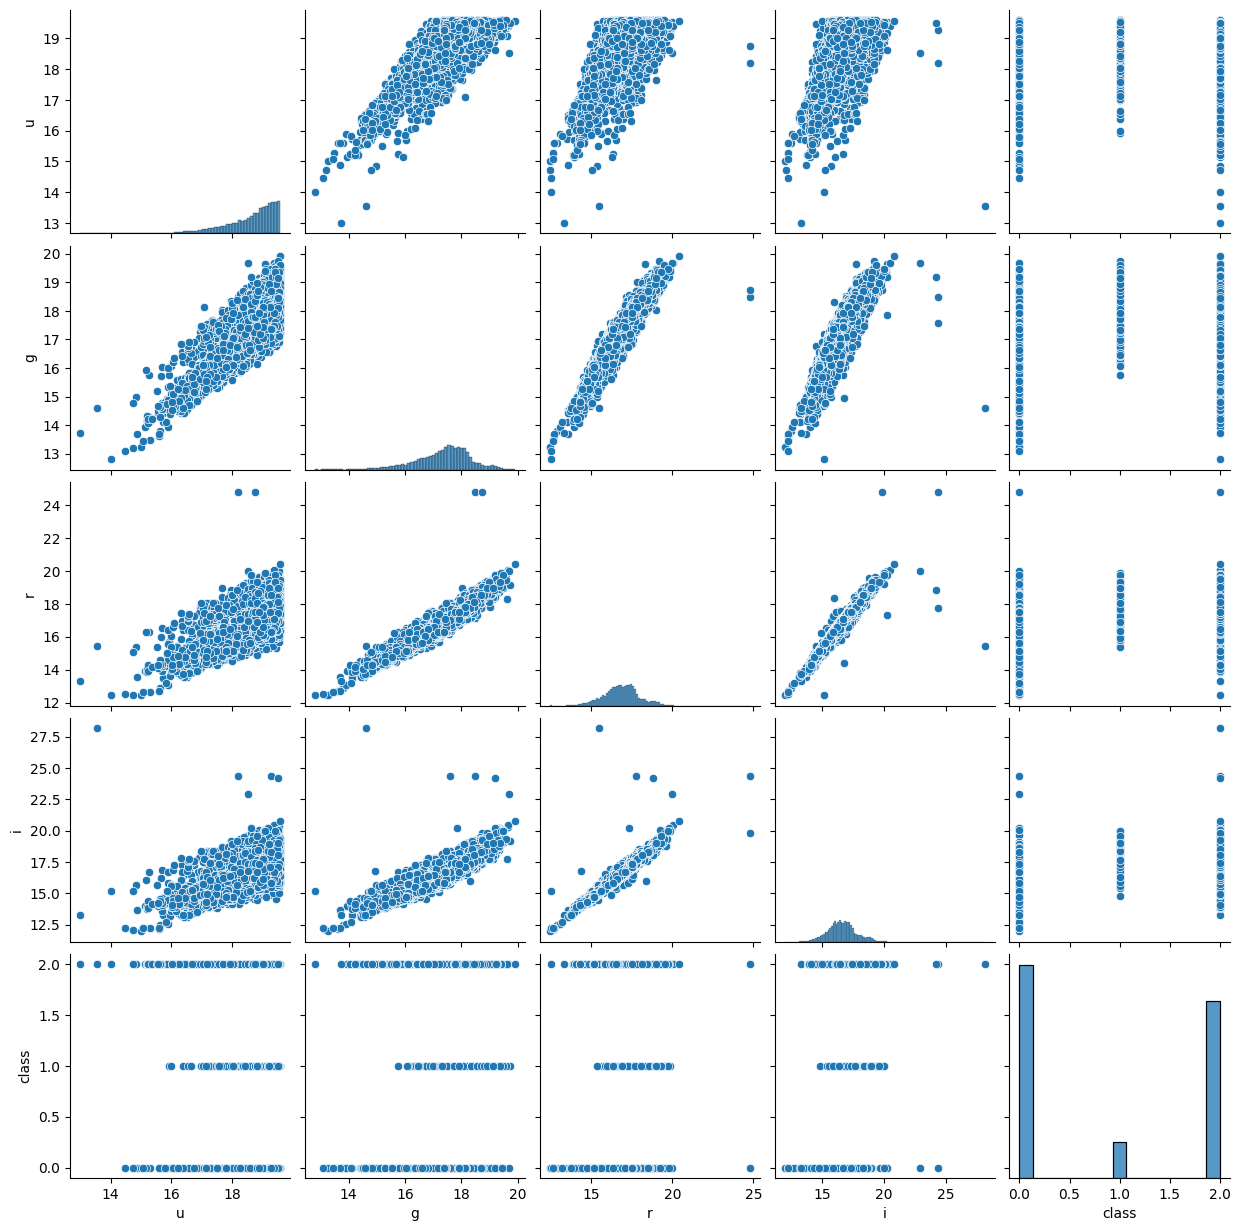

In [19]:
sns.pairplot(data[['u','g','r','i','class']])

<Axes: xlabel='class', ylabel='count'>

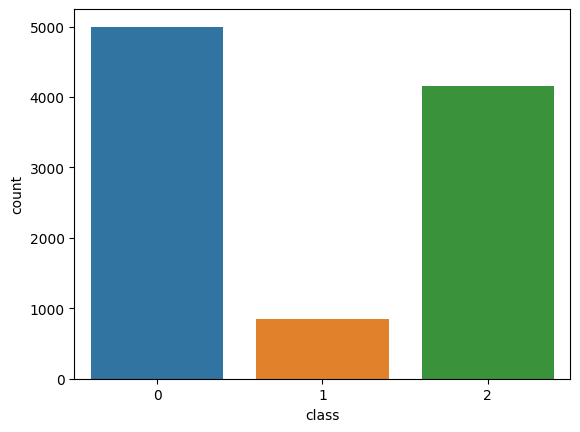

In [22]:
sns.countplot(x=data['class'])


In [23]:
from sklearn.tree import DecisionTreeClassifier
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)
dtClassifer.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15)

In [25]:
y_preds = dtClassifer.predict(x_test)


In [26]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']

print('\033[1m  Decision Tree -\n  \033[0m',classification_report(y_preds,y_test,target_names=target_names) + '\n')

  Decision Tree -
                 precision    recall  f1-score   support

           0       0.99      0.99      0.99      1504
           1       0.94      0.98      0.96       255
           2       1.00      1.00      1.00      1241

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000




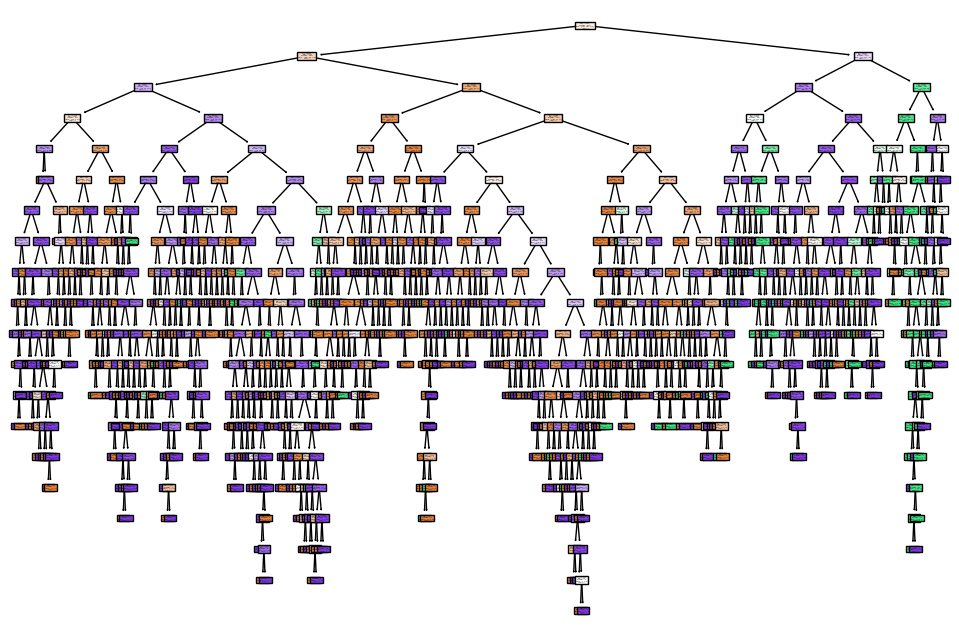

In [33]:
#visualising decision tree
from sklearn.tree import  plot_tree

features = ['u', 'g', 'r', 'i', 'z']
X = data[features]
y = data['class']

y = y.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(dtClassifier, filled=True, feature_names=features, class_names=data['class'].unique().astype(str))
plt.show()


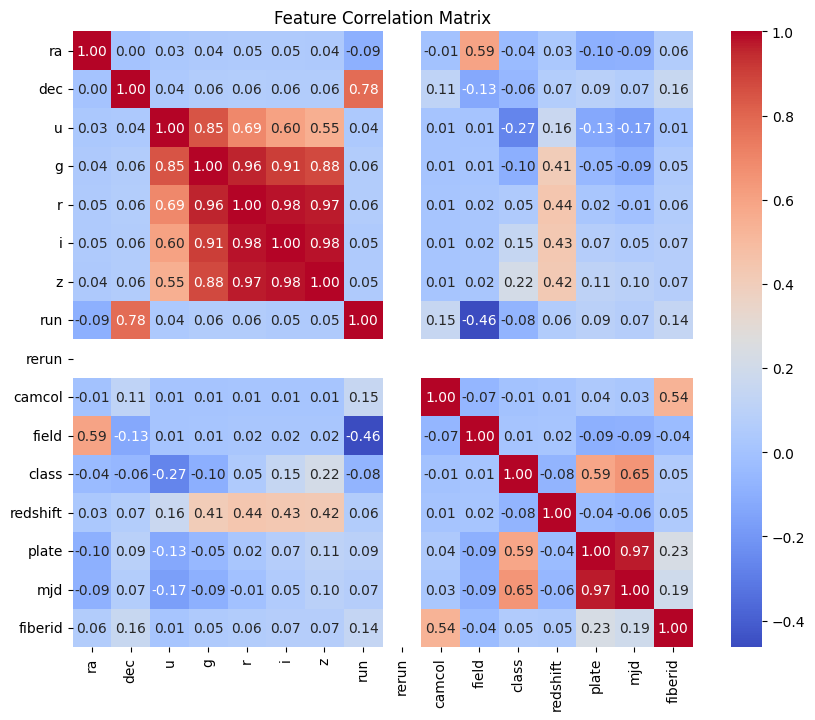

In [44]:

from sklearn.metrics import accuracy_score

# Display the correlation matrix
correlation_matrix = data.corr()

# Display a heatmap of the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


